# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

In [35]:
import pandas as pd
import numpy as np

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('student_depression_dataset.csv')

## EDA

In [38]:
df['id'] = df['id'].astype('int')
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('int')
df['City'] = df['City'].astype('category')
df['Profession'] = df['Profession'].astype('category')

df['Academic Pressure'] = df['Academic Pressure'].astype('int')
df['Work Pressure'] = df['Work Pressure'].astype('int')

df['Study Satisfaction'] = df['Study Satisfaction'].astype('int')
df['Job Satisfaction'] = df['Job Satisfaction'].astype('int')

df['CGPA'] = df['CGPA'].astype('float64')

df['Sleep Duration'] = df['Sleep Duration'].astype('category')
df['Dietary Habits'] = df['Dietary Habits'].astype('category')

df['Degree'] = df['Degree'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')

df['Work/Study Hours'] = df['Work/Study Hours'].astype('int')

''' Обрабатываем использование "?" в колонке '''
df['Financial Stress'][df['Financial Stress']=='?'] = 0
df['Financial Stress'][df['Financial Stress']=='1.0'] = 1
df['Financial Stress'][df['Financial Stress']=='2.0'] = 2
df['Financial Stress'][df['Financial Stress']=='3.0'] = 3
df['Financial Stress'][df['Financial Stress']=='4.0'] = 4
df['Financial Stress'][df['Financial Stress']=='5.0'] = 5
df['Financial Stress'] = df['Financial Stress'].astype('int')

df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')
df['Depression'] = df['Depression'].astype('int')

df = df.drop('id', axis=1)

На этот раз возьмем в качестве переменной для предсказания `Depression`.

Проведем тестирование на наличие зависимости между целевой переменной и признаками.

### Графический анализ

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

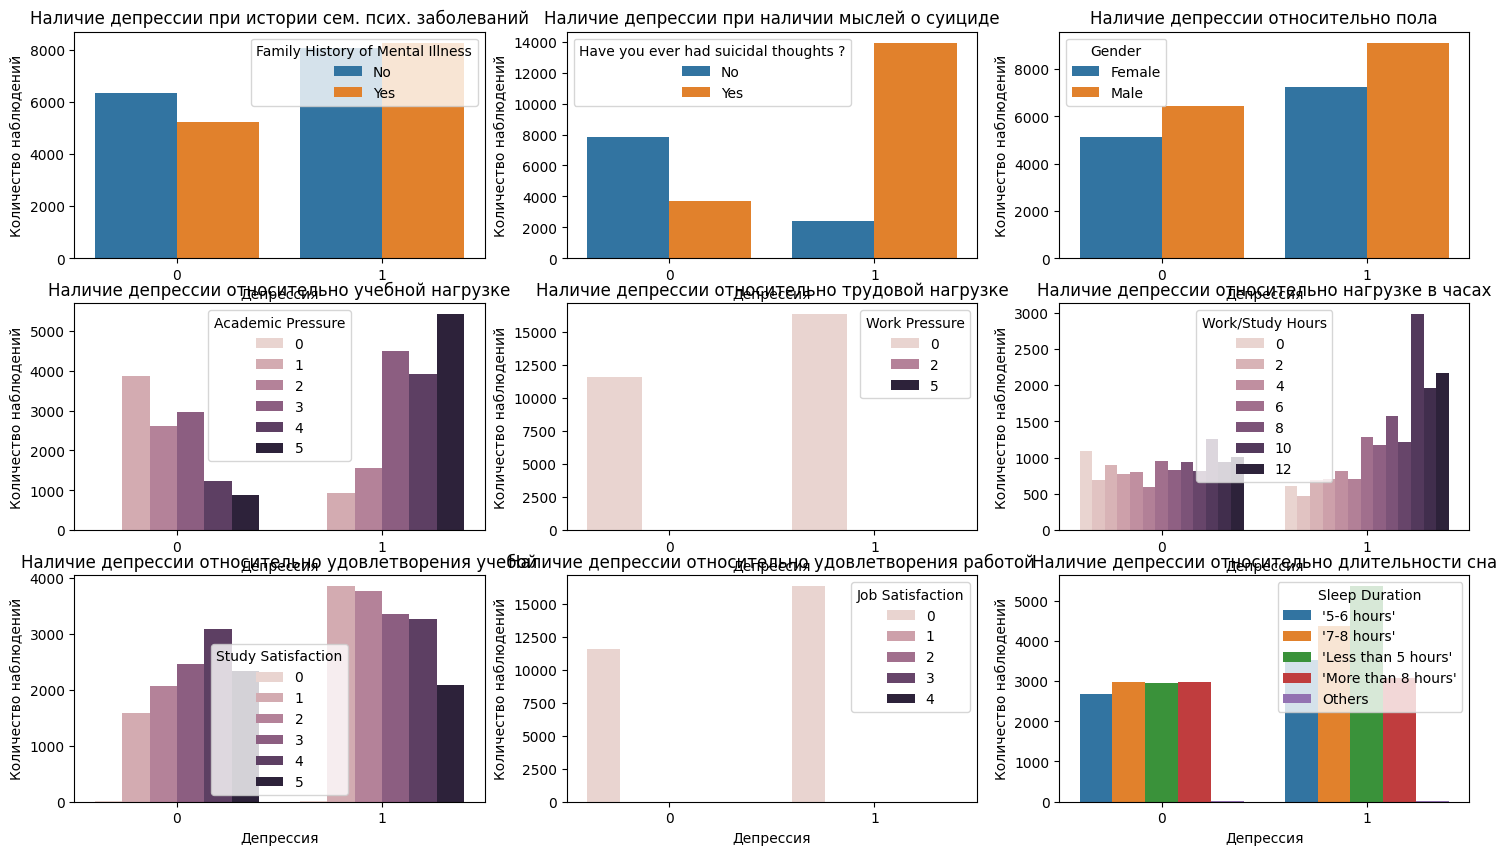

In [40]:
plt.figure(figsize=(18, 10))

plt.subplot(3, 3, 1)
sns.countplot(data=df, x='Depression', hue='Family History of Mental Illness')
plt.title('Наличие депрессии при истории сем. псих. заболеваний')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 2)
sns.countplot(data=df, x='Depression', hue='Have you ever had suicidal thoughts ?')
plt.title('Наличие депрессии при наличии мыслей о суициде')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 3)
sns.countplot(data=df, x='Depression', hue='Gender')
plt.title('Наличие депрессии относительно пола')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 4)
sns.countplot(data=df, x='Depression', hue='Academic Pressure')
plt.title('Наличие депрессии относительно учебной нагрузке')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 5)
sns.countplot(data=df, x='Depression', hue='Work Pressure')
plt.title('Наличие депрессии относительно трудовой нагрузке')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')

plt.subplot(3, 3, 6)
sns.countplot(data=df, x='Depression', hue='Work/Study Hours')
plt.title('Наличие депрессии относительно нагрузке в часах')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')

plt.subplot(3, 3, 7)
sns.countplot(data=df, x='Depression', hue='Study Satisfaction')
plt.title('Наличие депрессии относительно удовлетворения учебой')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')


plt.subplot(3, 3, 8)
sns.countplot(data=df, x='Depression', hue='Job Satisfaction')
plt.title('Наличие депрессии относительно удовлетворения работой')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')

plt.subplot(3, 3, 9)
sns.countplot(data=df, x='Depression', hue='Sleep Duration')
plt.title('Наличие депрессии относительно длительности сна')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')




plt.show()

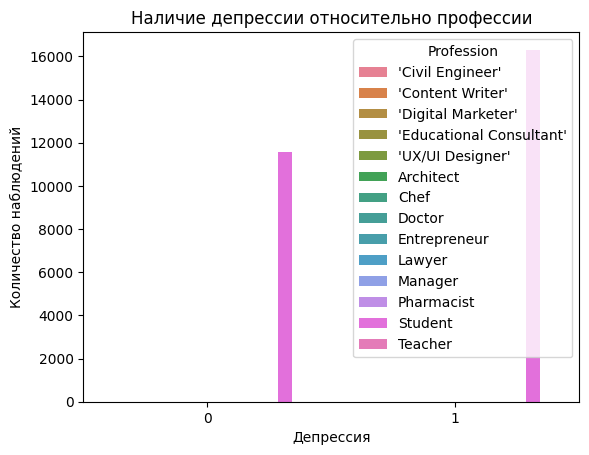

In [41]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='Depression', hue='Profession')
plt.title('Наличие депрессии относительно профессии')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')

plt.show()

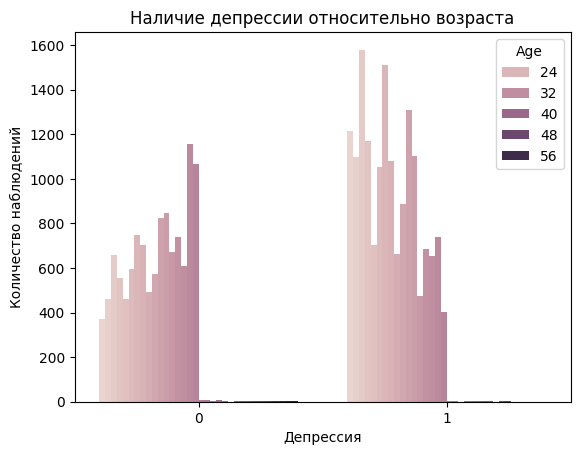

In [42]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='Depression', hue='Age')
plt.title('Наличие депрессии относительно возраста')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')

plt.show()

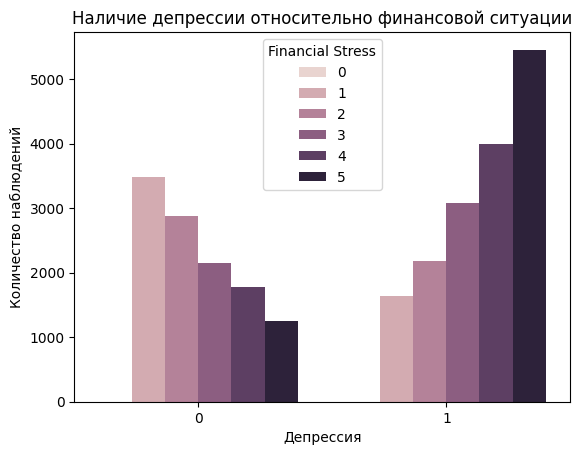

In [43]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='Depression', hue='Financial Stress')
plt.title('Наличие депрессии относительно финансовой ситуации')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')

plt.show()

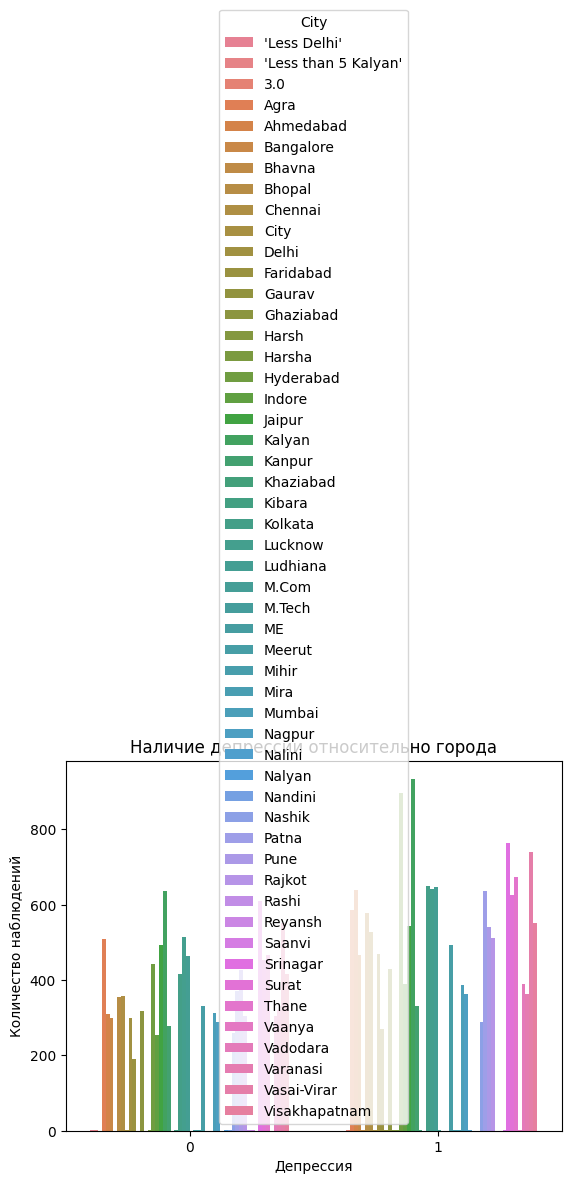

In [44]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='Depression', hue='City')
plt.title('Наличие депрессии относительно города')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')

plt.show()

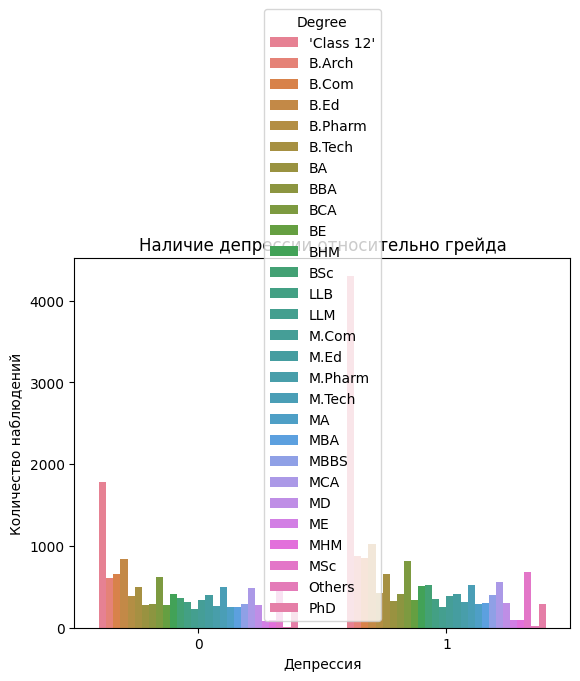

In [45]:
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='Depression', hue='Degree')
plt.title('Наличие депрессии относительно грейда')
plt.xlabel('Депрессия')
plt.ylabel('Количество наблюдений')

plt.show()

Выводы по графикам:
- наличие истории психических заболеваний в семье студента немного влияет на вероятность депрессии;
- студенты в депрессии многократно чаще испытывали имели мысли о суициде;
- датасет не выровнен в половом плане, но распределение депресии у мужчин и женщин примерно одинаково;
- высокая учебная нагрузка сильно влияет на депрессивность;
- количество значений, отличных от 0 в столбце `Work Pressure`, ничтожно мало. Тоже самое касается `Job Satisfaction`;
- наблюдается сильное неравенство в рабочей нагрузке в часах между страдающими от депресии и ~~наслаждающимися ей~~ нет - разнообразие в значениях 
    сильно выше у первых, но при этом нагрузка свыше 6 часов встречается у них резко чаще.
- также бо́льшее разнообразие значений можно увидеть в графике длительности сна, однако студенты в депрессии чаще спят меньше 5 часов.
    Значением `Others` можно принебречь из-за ничтожного количества строк с этим значением;
- психическое здоровье студентов обратно пропорционально их удовлетворением учёбой;
- тоже самое касается финансового стресса;
- молодые студенты страдают от депрессии чаще возрастных;
- профессией можно пренебречь из-за нехватки разнообразия данных;
- в колонке `City` слишком много "грязных" данных, анализировать сложно, однако графики примерно похожи;
- похожи и графики в грейдах.

На этом моменте уже можно отсеять несколько незначительных колонок:
- `City` - как минимум 7 бессмыссленных значений, сложно и долго интерпретировать;
- `Profession`, `Job Satisfaction`, `Work Pressure` - наличие у студентов работы ничтожно мало. 

`Degree` - первый кандидат на удаление, но останется для более χ²-тестирования.

In [46]:
df = df.drop('City', axis=1)
df = df.drop('Profession', axis=1)
df = df.drop('Job Satisfaction', axis=1)
df = df.drop('Work Pressure', axis=1)

In [47]:
Y = df['Depression']
df = df.drop('Depression', axis=1)

### χ²-тестирование

In [48]:
col_names = df.columns
chi2_values = []
p_values = []
dof_values = []
expected_values = []

In [49]:
from scipy.stats import chi2_contingency

for i in range(len(df.columns)):
    table = pd.crosstab(Y, df[df.columns[i]])
    chi2, p, dof, expected = chi2_contingency(table)
    chi2_values.append(chi2)
    p_values.append(p)
    dof_values.append(dof)
    expected_values.append(expected)


res_dict = {
    'Признак': col_names,
    'χ²-значение': chi2_values,
    'p-значение': p_values,
    'Степень свободы': dof_values,
    'Ожидаемые частоты': expected_values
}

res_df = pd.DataFrame(res_dict)
res_df

,Признак,χ²-значение,p-значение,Степень свободы,Ожидаемые частоты
0,Gender,0.082658,7.737273e-01,1,"[[5120.748718683918, 6444.251281316082], [7233..."
1,Age,1742.745907,0.000000e+00,33,"[[657.8135192287015, 646.6219848750941, 927.23..."
2,Academic Pressure,6427.249219,0.000000e+00,5,"[[3.730511451202466, 1990.0206085803377, 1731...."
3,CGPA,527.752644,3.253746e-11,331,"[[3.730511451202466, 7.046521630049102, 6.2175..."
4,Study Satisfaction,793.872438,2.448361e-169,5,"[[4.145012723558295, 2259.446435611627, 2419.8..."
5,Sleep Duration,276.848380,1.065311e-58,4,"[[2562.861366976094, 3044.926346725924, 3444.5..."
6,Dietary Habits,1202.638176,1.962485e-260,3,"[[3171.3492347944516, 4112.267123042185, 4.974..."
7,Degree,531.355688,5.125450e-95,27,"[[2520.1677359234436, 612.632880541916, 624.23..."
8,Have you ever had suicidal thoughts ?,8323.866373,0.000000e+00,1,"[[4246.565535285474, 7318.434464714526], [5998..."
9,Work/Study Hours,1288.417899,1.559334e-268,12,"[[704.6521630049102, 476.676463209204, 659.057..."


In [50]:
sorted_df = res_df[res_df['p-значение'] < 0.05].copy()

sorted_df['χ²-значение'] = sorted_df['χ²-значение'].round(2)

candidates = sorted_df[['Признак', 'χ²-значение', 'p-значение']]

candidates

,Признак,χ²-значение,p-значение
1,Age,1742.75,0.000000e+00
2,Academic Pressure,6427.25,0.000000e+00
3,CGPA,527.75,3.253746e-11
4,Study Satisfaction,793.87,2.448361e-169
5,Sleep Duration,276.85,1.065311e-58
6,Dietary Habits,1202.64,1.962485e-260
7,Degree,531.36,5.125450e-95
8,Have you ever had suicidal thoughts ?,8323.87,0.000000e+00
9,Work/Study Hours,1288.42,1.559334e-268
10,Financial Stress,3703.10,0.000000e+00


Все признаки имеют высокую значимость для дальнейшей обработки, более того, 4 из них выходят за пределы точности вычислений и рисуют `0` в `p-value`. 

In [51]:
best_features = candidates['Признак']

## Нормализация

### Числовые признаки

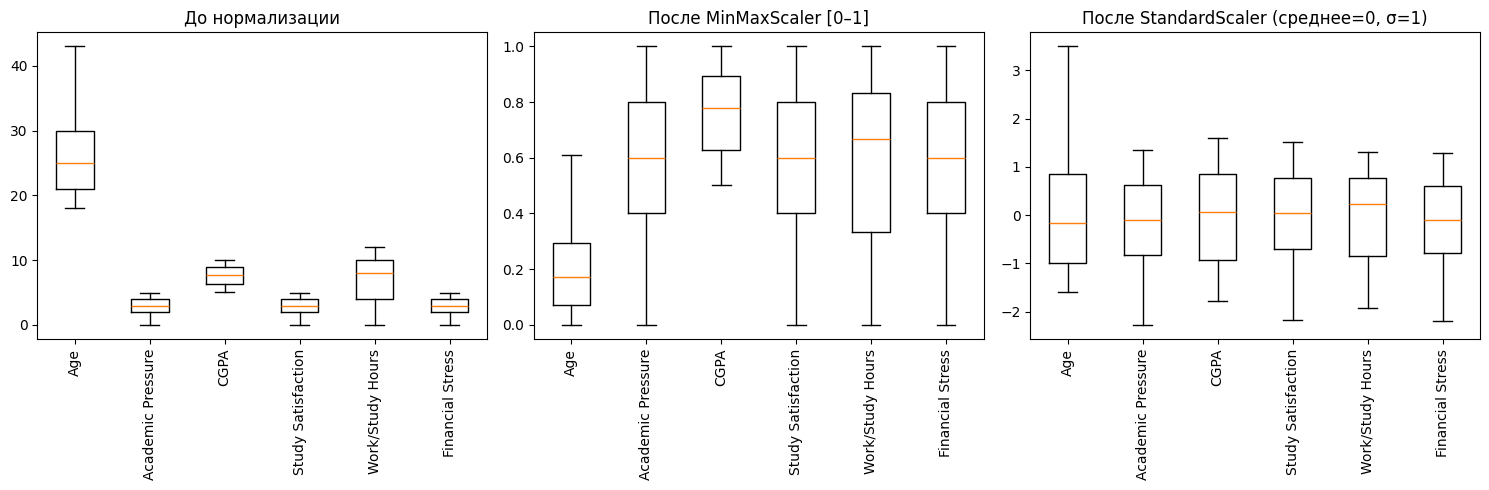

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

num_df = df[best_features].select_dtypes(include=[int, float]).copy()

minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(num_df), columns=num_df.columns)
std_scaled = pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)

# --- Визуализация ---
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].boxplot(num_df.values, showfliers=False)
axes[0].set_title("До нормализации")
axes[0].set_xticks(range(1, len(num_df.columns)+1))
axes[0].set_xticklabels(num_df.columns, rotation=90)

axes[1].boxplot(minmax_scaled.values, showfliers=False)
axes[1].set_title("После MinMaxScaler [0–1]")
axes[1].set_xticks(range(1, len(num_df.columns)+1))
axes[1].set_xticklabels(num_df.columns, rotation=90)

axes[2].boxplot(std_scaled.values, showfliers=False)
axes[2].set_title("После StandardScaler (среднее=0, σ=1)")
axes[2].set_xticks(range(1, len(num_df.columns)+1))
axes[2].set_xticklabels(num_df.columns, rotation=90)

plt.tight_layout()
plt.show()


`StandardScaler` дал лучшие результаты, но возрастные студенты все равно дали сильный перекос по выбросам.

In [53]:
X_num_scaled = std_scaled.copy()

### Категориальные признаки

Закодируем категориальные признаки через `OneHotEncoder`.

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(sparse_output=False)
cat_features = df[best_features].select_dtypes(include='category').copy()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, cat_features.columns)
    ],
    remainder='passthrough'
)

cat_encoded = preprocessor.fit_transform(cat_features)


feature_names = preprocessor.get_feature_names_out()
X_cat_encoded = pd.DataFrame(cat_encoded, columns=feature_names)

X_cat_encoded

,cat__Sleep Duration_'5-6 hours',cat__Sleep Duration_'7-8 hours',cat__Sleep Duration_'Less than 5 hours',cat__Sleep Duration_'More than 8 hours',cat__Sleep Duration_Others,cat__Dietary Habits_Healthy,cat__Dietary Habits_Moderate,cat__Dietary Habits_Others,cat__Dietary Habits_Unhealthy,cat__Degree_'Class 12',...,cat__Degree_MD,cat__Degree_ME,cat__Degree_MHM,cat__Degree_MSc,cat__Degree_Others,cat__Degree_PhD,cat__Have you ever had suicidal thoughts ?_No,cat__Have you ever had suicidal thoughts ?_Yes,cat__Family History of Mental Illness_No,cat__Family History of Mental Illness_Yes
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
27897,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
27898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
27899,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
y = Y
X = pd.concat([X_cat_encoded, X_num_scaled], axis=1)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
) # stratify - разделение данных с учетом распределнеия категориальной переменной

In [58]:
# объявим модель
model = LogisticRegression(
    penalty=None, # регуляризация (добавление штрафа за большие коэфициенты)
    random_state=42,
)

In [60]:
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

In [61]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)


def evaluate_classification(y_true, y_pred, y_proba=None):

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    roc_auc = None
    if y_proba is not None:
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("=== Метрики классификации ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }

In [62]:
metrics = evaluate_classification(y_train, y_train_pred, y_train_proba)

=== Метрики классификации ===
Accuracy:  0.8473
Precision: 0.8467
Recall:    0.8473
F1-score:  0.8467
ROC-AUC:   0.9212

Confusion Matrix:
[[ 6416  1679]
 [ 1304 10131]]


Вывод: получилась довольно хорошая модель с метриками:
- модель отнесла к `True Positive` и `True Negative` большинство наблюдений (~16000 v. ~3000);
- метрики демонстрируют высокую (около `85%`) способность к различению классов.